Distribución t de Student
===

* Es una distribución con forma de campana, un poco más delgada y con colas más gruesas que la distribución normal. 

* Fue obtenida al considerar la siguiente pregunta: ¿Cuál es la distribución muestral de la media de una muestra obtenida de una población grande?.

* Esta distribución es ampliamente usada como referencia para muestras de medias, diferencia entre dos medias muestrales, parámetros de modelos de regresión, etc.

---

La distribución t de Student se obtiene al considerar un modelo que represente la forma de la curva indicada por los histogramas que aparecen abajo. En el algoritmo que se presenta a continuación, el objetivo es estandarizar los valores de las medias.

* Sea una muestra $x_1, \ldots, x_n$ obtenida de una población continua normalmente distribuida con media $\mu$.

* La media muestral se obtiene como:
$$
\bar{x} = \frac{x_1 + \cdots + x_n}{n}
$$

* La varianza muestral se obtiene como:
$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2
$$

* El valor-$t$ se define como:
$$
t=\frac{\bar{x}-\mu}{s / \sqrt{n}}
$$

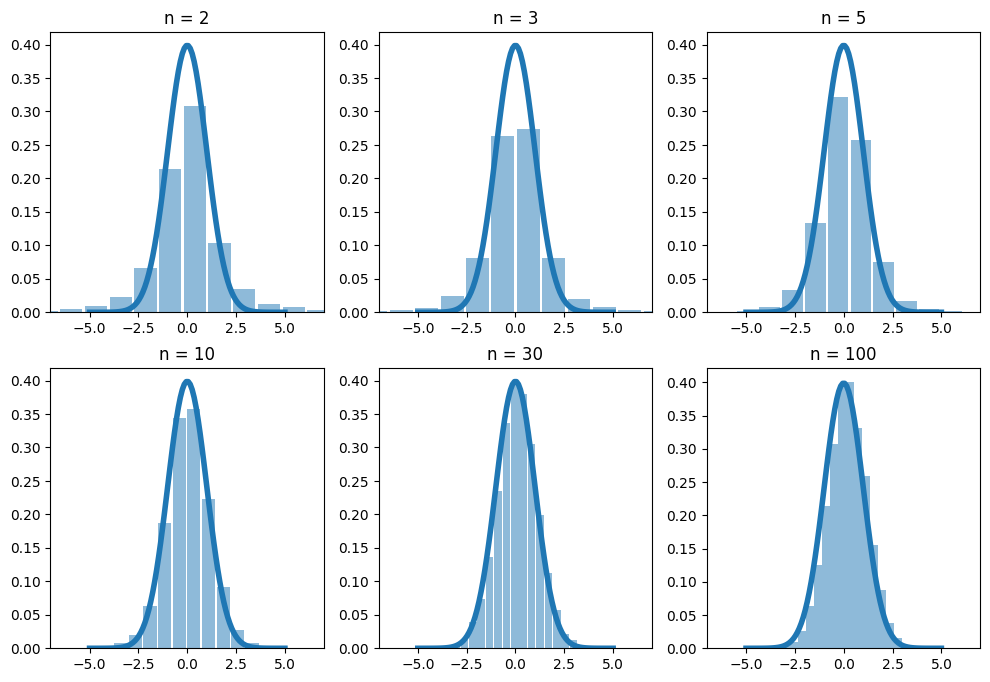

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

plt.figure(figsize=(12, 8))
z = np.linspace(-5, 5, 100)

# Generación de una muestra de 10000 numeros aleatorios normales N(1, 1.5^2)
sample_data = pd.Series(np.random.normal(loc=1, scale=1.5, size=10000))

for i, n in enumerate([2, 3, 5, 10, 30, 100]):
    sample = [sample_data.sample(n) for _ in range(10000)]
    xbar = [x.mean() for x in sample]
    s2 = [x.var() for x in sample]
    t = [
        (x_mean - 1.0) / (np.sqrt(s) / np.sqrt(n))
        for x_mean, s in zip(xbar, s2)
        if s > 0.1
    ]

    plt.subplot(2, 3, i + 1)
    plt.hist(t, density=True, alpha=0.5, bins=20, rwidth=0.9)
    plt.plot(z, norm.pdf(z, loc=0, scale=1), color="tab:blue", lw=4)
    plt.title("n = " + str(n))
    plt.xlim(-7, 7)